In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install missingno
import missingno as msno

Note: you may need to restart the kernel to use updated packages.


In [2]:
train = pd.read_csv("data/train.csv")
train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [3]:
missing_values = {col: train[col].isnull().sum() for col in train.columns}
missing_values

{'Type': 0,
 'Name': 1257,
 'Age': 0,
 'Breed1': 0,
 'Breed2': 0,
 'Gender': 0,
 'Color1': 0,
 'Color2': 0,
 'Color3': 0,
 'MaturitySize': 0,
 'FurLength': 0,
 'Vaccinated': 0,
 'Dewormed': 0,
 'Sterilized': 0,
 'Health': 0,
 'Quantity': 0,
 'Fee': 0,
 'State': 0,
 'RescuerID': 0,
 'VideoAmt': 0,
 'Description': 12,
 'PetID': 0,
 'PhotoAmt': 0,
 'AdoptionSpeed': 0}

In [164]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to /root/nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to /root/nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to /root/nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to /root/nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_treebanks_v20 to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Packa

True

In [38]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('english')) 

def tagger(record):
    if not record or type(record) != str:
        return np.nan
    tokenized = sent_tokenize(record)
    for i in tokenized: 

        words_list = nltk.word_tokenize(i) 
        words_list = [w for w in words_list if not w in stop_words]  

        tagged = nltk.pos_tag(words_list) 

    return tagged

In [10]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [39]:
names_df = train[["Name"]]
names_df["POS"] = names_df["Name"].apply(tagger)
names_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Name,POS
0,Nibble,"[(Nibble, JJ)]"
1,No Name Yet,"[(No, DT), (Name, NN), (Yet, RB)]"
2,Brisco,"[(Brisco, NNP)]"
3,Miko,"[(Miko, NN)]"
4,Hunter,"[(Hunter, NN)]"
5,NaN,NaN
6,BULAT,"[(BULAT, NN)]"
7,Siu Pak & Her 6 Puppies,"[(Siu, NNP), (Pak, NNP), (&, CC), (Her, NNP), ..."
8,NaN,NaN
9,Kitty,"[(Kitty, NNP)]"


# Name validity

We determine wether the given name is valid for the given animal with some simple rules:

- adjectives, adverbs, verbs are valid if the text is one word long
- nouns and conjunctions are valid (list of pet names)
- determiners are never allowed, because it infers a sentence not a name (it is not a necessary rule, but keeping it as is, so if the code changes, this is not broken)

In [95]:
def mark_as_spam(record):
    if type(record) != list:
        return False
    if len(record) == 1 and record[0][1] in ["RB", "JJ", "VB"]: # for simple pet names like: Lily, Rocky
        return True
    for w, t in record:
        if "DT" in t: # DT PDT WDT should only appear in sentences, not names
            return False
        if not (t == "NN" or t == "NNP" or t == "CC" or w == ","): 
            # CC and , are allowed because of the multi pet records (there can be more pets in one record)
            return False
    return True
    
valid_names_df = names_df.copy()
valid_names_df["valid"] = valid_names_df["POS"].apply(mark_as_spam)
valid_names_df["valid"].value_counts()

True     10662
False     4331
Name: valid, dtype: int64

In [66]:
%pip install wordcloud
from wordcloud import WordCloud

     |████████████████████████████████| 368kB 976kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


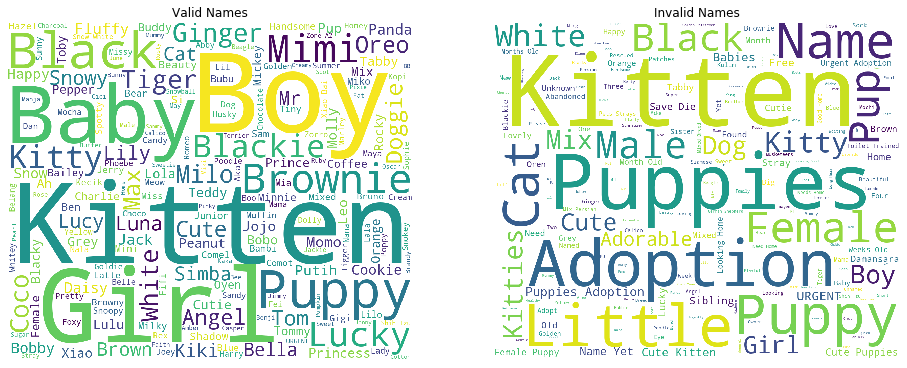

In [96]:
fig, ax = plt.subplots(figsize = (16, 12))
for i, is_valid, text in zip([1,2], [True, False], ["Valid Names", "Invalid Names"]):
    plt.subplot(1, 2, i)
    names_text = ' '.join(valid_names_df[valid_names_df["valid"] == is_valid]["Name"].fillna('').values)
    wordcloud = WordCloud(max_font_size=None, background_color='white',
                          width=1200, height=1000).generate(names_text)
    plt.imshow(wordcloud)
    plt.title(text)
    plt.axis("off")

In [120]:
names_arr = [name.split() for name in valid_names_df[valid_names_df["valid"] == True]["Name"].values]
names_flattened = [y for x in names_arr for y in x]
print("Number of words: %d" % len(names_flattened))
print("Number of unique words: %d" % len(list(set(names_flattented))))
pd.Series(names_flattened).value_counts()

Number of words: 15399
Number of unique words: 6002


&                          561
And                        332
Boy                        154
Baby                       144
Girl                       142
Kitten                     114
Black                       79
Puppy                       78
Brownie                     75
Lucky                       72
Kitty                       69
Mimi                        67
White                       66
Blackie                     64
Xiao                        61
Tiger                       57
Coco                        53
Ginger                      52
Cute                        51
Doggie                      49
Milo                        49
Max                         48
Oreo                        45
Angel                       44
Snow                        44
Tom                         42
Lily                        39
Luna                        39
Kittens                     38
Snowy                       38
                          ... 
Gegirl                       1
Spongebo

Almost half of the words in names is recuring. Might be used in a model.

In [121]:
pd.Series({k: v for k, v in dict(pd.Series(names_flattened).value_counts()).items() if v == 1})

Dotdot                               1
Evie,                                1
Kecik~                               1
Sockist                              1
Cappucino,Milo,Milky,Browny,Lucky    1
Boba,                                1
Cumi                                 1
ELVIS                                1
Elle                                 1
Balang                               1
Daudsu,                              1
San-kun                              1
Stoking                              1
Taki                                 1
Shadowz                              1
Max-A-Million                        1
La-dyy                               1
Mixy                                 1
MIA_Selangor                         1
Tuxedo,                              1
Kittycat                             1
M3                                   1
Sharpei                              1
Q7                                   1
Elton                                1
BELLA                    

There are still 4304 independent values in the dataset.

In [112]:
def plot_categorical_variable(df, category, target="AdoptionSpeed", cat_to_label=None, subplot=False):
    if cat_to_label == None:
        cat_to_label = {c: c for c in df[category].unique()}
    plt.figure(figsize=(20, 10))
    num_categories = len(df[category].unique())
    for i, cat in enumerate(df[category].unique()):
        if subplot:
            plt.subplot((num_categories / 2)+1, (num_categories % 2)+1, i+1)
        sns.distplot(df[df[category] == cat][target], kde_kws={"label": cat_to_label[cat]})

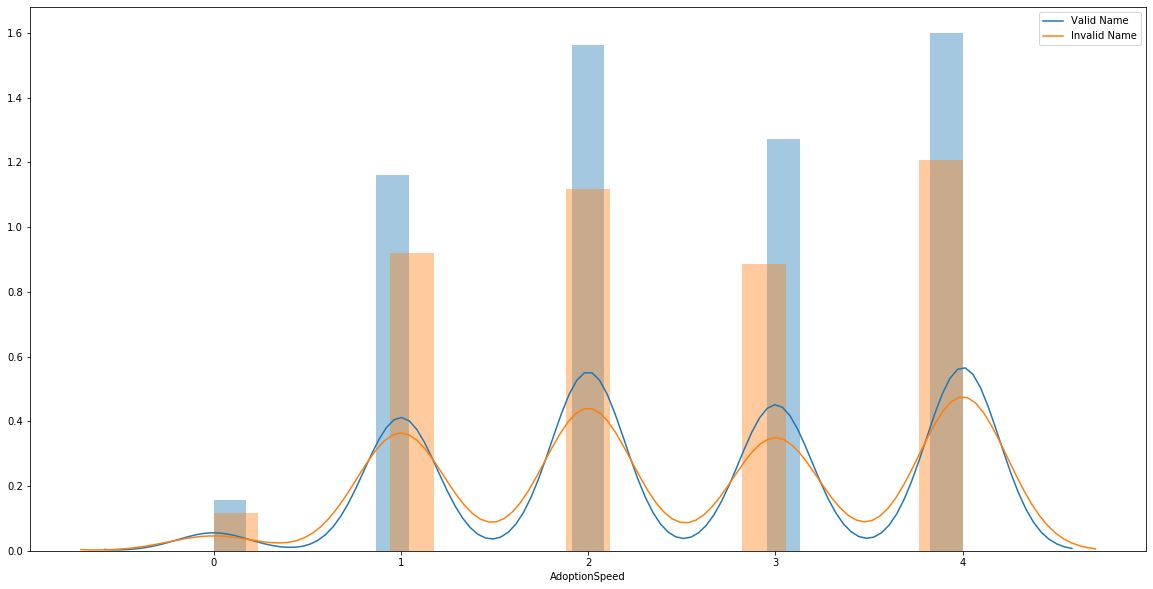

In [118]:
viz = valid_names_df.copy()
viz["AdoptionSpeed"] = train["AdoptionSpeed"]
plot_categorical_variable(viz, "valid", cat_to_label={True: "Valid Name", False: "Invalid Name"})

As the plot above shows us, name validity is invariant to adoption speed.

# TF-IDF

We use tf, idf and tf-idf to identify patterns in the words used in names and the adoption speed (optionally over the manually tweeked validity feature)

In [133]:
# Average term frequency
names_arr = [name.split() for name in valid_names_df["Name"].values if type(name) == str]
names_flattened = [y for x in names_arr for y in x]
def df(word):
    count = 0
    for sub_arr in names_arr:
        if word in sub_arr:
            count += 1
    
    return count
tf = dict(pd.Series(names_flattened).value_counts())
N = len(names_arr)
tfidf_df = valid_names_df.copy()
tfidf_df["TF"] = viz["Name"].apply(lambda name: np.mean([tf[word] for word in name.split()]) if type(name) == str else name)
tfidf_df["IDF"] = viz["Name"].apply(lambda name: np.mean([np.log(N/df(word)) for word in name.split()]) if type(name) == str else name)
tfidf_df["TF-IDF"] = viz["Name"].apply(lambda name: np.mean([tf[word]*np.log(N/df(word)) for word in name.split()]) if type(name) == str else name)
tfidf_df["AdoptionSpeed"] = train["AdoptionSpeed"]
tfidf_df.head()

,Name,POS,valid,TF,IDF,TF-IDF
0,Nibble,"[(Nibble, JJ)]",True,1.000000,9.527775,9.527775
1,No Name Yet,"[(No, DT), (Name, NN), (Yet, RB)]",False,84.333333,5.185902,424.526611
2,Brisco,"[(Brisco, NNP)]",True,1.000000,9.527775,9.527775
3,Miko,"[(Miko, NN)]",True,18.000000,6.637404,119.473266
4,Hunter,"[(Hunter, NN)]",True,7.000000,7.581865,53.073057


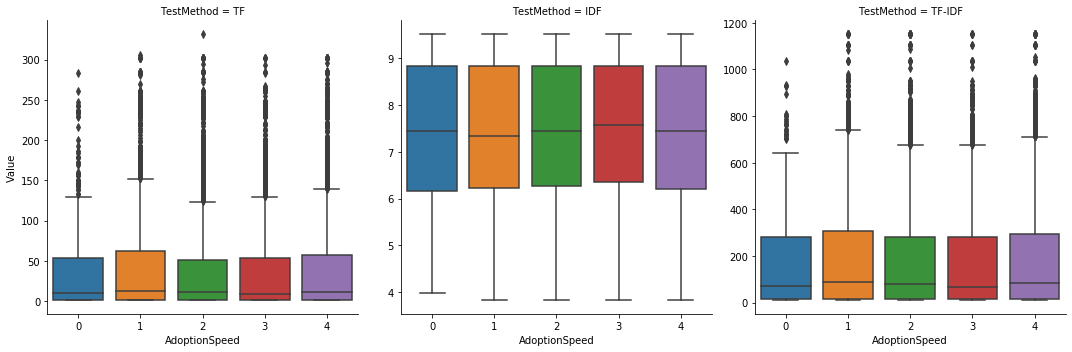

In [162]:
viz = pd.melt(tfidf_df, id_vars=["AdoptionSpeed", "valid"], value_vars=["TF", "IDF", "TF-IDF"],
             var_name="TestMethod", value_name="Value")
sns.catplot(data=viz, x="AdoptionSpeed", y="Value", kind="box", col="TestMethod", sharey=False)

TF and IDF have almost no diversity between the adoption types, but with TF-IDF it may be easier to identify Type 0 adoptions.

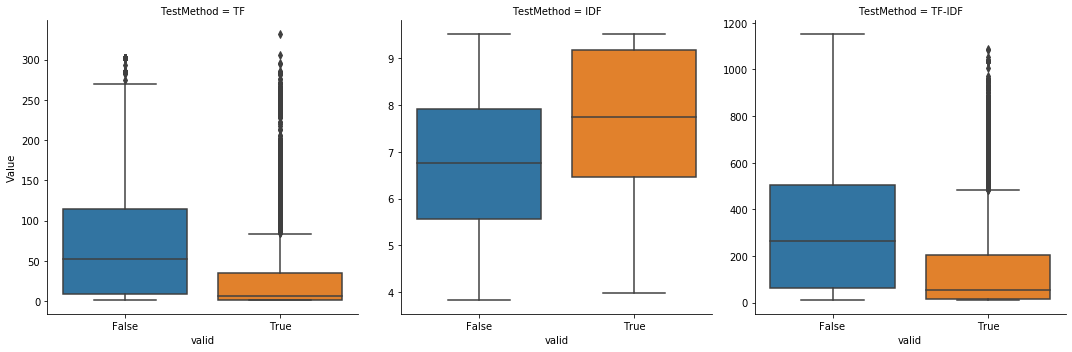

In [163]:
viz = pd.melt(tfidf_df, id_vars=["AdoptionSpeed", "valid"], value_vars=["TF", "IDF", "TF-IDF"],
             var_name="TestMethod", value_name="Value")
sns.catplot(data=viz, x="valid", y="Value", kind="box", col="TestMethod", sharey=False)

On the augmented feature we can tell the non-valid names have less unique words inside them (TF column variance) but TF-IDF suggests the non name columns contain more information.

#### Both the columns valid and tf-idf represent the name column well. 